Download CSV Files & Load Data into SQL (Python & SQL)


In [1]:
import pandas as pd
import numpy as np
from mysql.connector import connect
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


In [2]:
import mysql.connector

# Connect to MySQL Server
conn = mysql.connector.connect(
    host="localhost",   # Change if MySQL is on another server
    user="root",  # Replace with your MySQL username
    password="godISGREAT078?"  # Replace with your MySQL password
)

if conn.is_connected():
    print("Connected to MySQL Server")

Connected to MySQL Server


In [3]:
cursor = conn.cursor()

# Create a new database
cursor.execute("CREATE DATABASE CUSTOMER_BEHAVIOUR_ANALYSIS_1")

print("Database created successfully")

# Close the cursor and connection
cursor.close()
conn.close()

Database created successfully


In [4]:
conn= mysql.connector.connect( 
    host="localhost", 
    user="root", 
    password="godISGREAT078?", 
    database="CUSTOMER_BEHAVIOUR_ANALYSIS_1" 
) 
 
cursor1 = conn.cursor()

# Create a table
cursor1.execute('''
    CREATE TABLE CUSTOMER_JOURNEY(
JourneyID int, 
CustomerID int, 
ProductID int ,
VisitDate text ,
Stage text, 
Action text,
Duration text
    )
''')
 
print("Table created successfully") 
 

# Close connection 
cursor1.close() 
conn.close() 
 


Table created successfully


In [5]:
# Reconnect to the database 
conn= mysql.connector.connect( 
    host="localhost", 
    user="root", 
    password="godISGREAT078?", 
    database="CUSTOMER_BEHAVIOUR_ANALYSIS_1" 
) 
 
cursor1= conn.cursor() 
 
# Insert data 
sql= "INSERT INTO CUSTOMER_JOURNEY(JourneyID,CustomerID,ProductID,VisitDate,Stage,Action,Duration) VALUES (%s, %s, %s, %s, %s, %s, %s)" 
values = [ (1,64,18,"2024-06-10","Checkout","Drop-off","0"),
          
(2,94,11,"2025-07-09","Checkout","Drop-off","0"),

(3,34,8,"2024-06-14","ProductPage","View","235.0"),

(4,33,18,"2025-05-28","Checkout","Drop-off","0"),

(5,91,10,"2023-02-11","Homepage","Click","156.0"),

(6,54,11,"2025-12-19","Homepage","View","264.0"),

(7,80,4,"2023-08-25","Homepage","View","298.0"),

(8,99,10,"2025-07-03","ProductPage","View","287.0"),

(9,31,4,"2025-06-13","ProductPage","View","278.0"),

(10,44,16,"2025-04-23","ProductPage","View","30.0"),

(11,23,12,"2023-08-22","Checkout","Drop-off","0"),

(12,97,12,"2023-07-28","ProductPage","View","227.0"),

(13,83,5,"2024-06-20","Homepage","View","223.0"),

(14,14,13,"2025-11-01","ProductPage","View","13.0"),

(15,9,1,"2025-11-04","ProductPage","View","292.0"),

(16,14,16,"2024-07-17","Homepage","View","46.0"),

(17,67,2,"2025-12-11","Homepage","View","185.0"),

(18,70,15,"2025-10-13","Homepage","View","191.0"),

(19,9,1,"2024-08-15","Homepage","View","187.0"),

(20,44,18,"2024-02-19","productpage","View","154.0"),

(21,58,20,"2024-03-07","Checkout","Drop-off","0"),

(22,12,1,"2025-11-19","Homepage","Click","20.0"),

(23,58,1,"2023-07-05","Homepage","View","48.0"),

(24,77,6,"2025-06-25","Checkout","Drop-off","0"),

(25,75,12,"2023-11-23","ProductPage","View","239.0"),

(26,78,20,"2024-04-17","Homepage","View","129.0"),

(27,36,9,"2024-08-10","Homepage","View","214.0"),

(28,1,20,"2025-09-26","ProductPage","View","64.0"),

(29,12,17,"2025-06-01","Homepage","View","205.0"),

(30,48,2,"2023-05-03","ProductPage","View","242.0"),

(31,81,19,"2023-04-04","Homepage","View","130.0"),

(32,67,11,"2023-09-04","Checkout","Drop-off","0"),

(33,2,5,"2025-08-10","Homepage","View","26.0"),

(34,55,15,"2023-10-26","Homepage","View","233.0"),

(35,60,19,"2023-06-21","homepage","Click","162.0"),

(36,17,2,"2023-11-20","Checkout","Purchase","137.0"),

(37,38,17,"2024-06-18","Checkout","Drop-off","0"),

(38,13,18,"2023-02-23","ProductPage","View","227.0"),

(39,63,18,"2023-08-10","ProductPage","View","233.0"),

(40,4,12,"2024-12-22","Homepage","View","110.0"),

(41,92,5,"2025-11-23","ProductPage","View","124.0"),

(42,95,10,"2025-01-28","Homepage","View","172.0"),

(43,21,8,"2025-03-14","Homepage","View","40.0"),

(44,29,3,"2024-02-29","Homepage","View","193.0"),

(45,94,6,"2023-06-07","productpage","View","118.0"),

(46,30,19,"2025-10-27","Homepage","View","210.0"),

(47,30,20,"2024-02-18","Checkout","Drop-off","0"),

(48,52,13,"2025-02-01","Homepage","View","241.0"),

(49,93,14,"2023-04-09","Homepage","Click","69.0"),

(50,5,9,"2024-04-19","Homepage","View","44.0"),

(51,65,8,"2025-09-29","ProductPage","View","272.0"),

(52,15,9,"2025-08-07","Checkout","Drop-off","0"),

(53,24,4,"2024-04-05","Homepage","View","182.0"),

(54,9,11,"2024-11-19","Checkout","Drop-off","0"),

(55,1,7,"2024-03-17","Checkout","Drop-off","0"),

(56,97,11,"2023-12-20","Homepage","Click","234.0"),

(57,52,14,"2024-12-02","Homepage","View","253.0"),

(58,51,20,"2025-03-08","ProductPage","View","174.0"),

(59,32,8,"2024-08-19","Homepage","View","238.0"),

(60,19,6,"2025-06-17","ProductPage","View","190.0"),

(61,69,20,"2025-07-12","Homepage","Click","14.0"),

(62,42,1,"2024-10-22","Homepage","View","186.0"),

(63,51,15,"2025-05-22","Homepage","View","139.0"),

(64,86,20,"2023-07-03","ProductPage","View","77.0"),

(65,54,10,"2023-12-23","Homepage","View","101.0"),

(66,52,2,"2023-11-16","homepage","Click","242.0"),

(67,25,1,"2023-05-21","ProductPage","Click","57.0"),

(68,45,16,"2023-04-29","ProductPage","Click","250.0"),

(69,82,19,"2025-02-21","ProductPage","Click","158.0"),

(70,75,17,"2023-07-07","Homepage","View","297.0"),

(71,40,20,"2023-07-13","Checkout","Drop-off","0"),

(72,47,15,"2023-08-23","Homepage","Click","34.0"),

(73,20,16,"2024-09-17","Homepage","View","17.0"),

(74,81,13,"2024-09-26","Homepage","Click","291.0"),

(75,93,1,"2024-10-01","ProductPage","Click","279.0"),

(76,42,17,"2025-05-29","Checkout","Purchase","261.0"),

(77,36,4,"2023-06-02","Homepage","Click","100.0"),

(78,46,17,"2025-06-15","Checkout","Purchase","122.0"),

(79,75,10,"2023-11-13","Homepage","View","244.0"),

(80,64,6,"2025-04-06","Homepage","Click","161.0"),

(81,89,15,"2025-10-27","Checkout","Purchase","246.0"),

(82,64,2,"2025-06-07","Homepage","Click","261.0"),

(83,54,8,"2024-01-18","ProductPage","Click","83.0"),

(84,79,15,"2025-03-09","Checkout","Purchase","48.0"),

(85,56,4,"2023-05-26","Homepage","Click","166.0"),

(86,83,3,"2023-09-06","Homepage","View","79.0"),

(87,2,2,"2023-09-25","Homepage","View","277.0"),

(88,15,20,"2025-12-18","homepage","View","136.0"),

(89,14,9,"2025-04-18","Homepage","Click","104.0"),

(90,49,8,"2025-03-25","Homepage","View","248.0"),

(91,99,10,"2023-12-07","Homepage","Click","244.0"),

(92,88,14,"2025-03-09","Homepage","View","29.0"),

(93,43,8,"2023-08-22","Checkout","Drop-off","0"),

(94,15,18,"2024-09-20","Homepage","Click","143.0"),

(95,60,8,"2024-09-14","Homepage","View","182.0"),

(96,22,9,"2024-07-28","ProductPage","View","212.0"),

(97,92,19,"2025-05-26","homepage","View","203.0"),

(98,95,8,"2025-05-25","Homepage","Click","68.0"),

(99,58,16,"2024-07-06","Checkout","Purchase","87.0"),

(100,92,10,"2024-04-06","ProductPage","View","237.0")

] 
cursor1.executemany(sql,values)  # Insert multiple rows 
conn.commit() 
 
print(cursor1.rowcount, "records inserted") 
 
# Close connection 
cursor1.close() 
conn.close() 
 



100 records inserted


In [6]:
# Reconnect to the new database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="godISGREAT078?",
    database="CUSTOMER_BEHAVIOUR_ANALYSIS_1"  # Now we specify the database name
)

cursor2 = conn.cursor()

# Create a table
cursor2.execute('''
    CREATE TABLE CUSTOMER_REVIEWS(
ReviewID int, 
CustomerID int,
ProductID int, 
ReviewDate text,
Rating int, 
ReviewText text
    )
''')
 
print("Table created successfully") 
 
# Close the cursor and connection 
cursor2.close() 
conn.close()

Table created successfully


In [7]:
# Reconnect to the database 
conn = mysql.connector.connect( 
    host="localhost", 
    user="root", 
    password="godISGREAT078?", 
    database="CUSTOMER_BEHAVIOUR_ANALYSIS_1" 
) 
 
cursor2 = conn.cursor() 
 
# Insert data 
sql = "INSERT INTO CUSTOMER_REVIEWS(ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText) VALUES (%s, %s, %s, %s, %s, %s)" 
values = [(1,77,18,"2023-12-23",3,"Average  experience,  nothing  special."),
(2,80,19,"2024-12-25",5,"The  quality  is    top-notch."),
(3,50,13,"2025-01-26",4,"Five  stars  for  the  quick  delivery."),
(4,78,15,"2025-04-21",3,"Good  quality,  but  could  be  cheaper."),
(5,64,2,"2023-07-16",3,"Average  experience,  nothing  special."),
(6,81,1,"2025-12-21",4,"Customer  support  was  very  helpful."),
(7,16,1,"2024-01-29",3,"Average  experience,  nothing  special."),
(8,55,8,"2024-08-15",5,"The  quality    is  top-notch."),
(9,3,13,"2023-09-01",4,"I  love  this  product,  will  buy  again!"),
(10,78,6,"2024-06-17",5,"Excellent  product,  highly  recommend!"),
(11,54,9,"2023-07-17",4,"Great  purchase,  very  satisfied."),
(12,77,2,"2025-01-13",2,"Product  did    not  meet  my  expectations."),
(13,93,6,"2024-08-20",5,"Great  purchase,  very  satisfied."),
(14,23,2,"2025-06-16",4,"Good  quality,  but  could  be  cheaper."),
(15,29,11,"2023-01-27",5,"Great  purchase,  very  satisfied."),
(16,95,17,"2023-01-06",5,"Excellent  product,  highly  recommend!"),
(17,88,4,"2025-10-29",3,"Not  worth  the  money."),
(18,17,16,"2024-11-23",4,"Shipping  was  fast  and  the  item  was  well-packaged."),
(19,34,13,"2024-01-04",4,"The  quality  is  top-notch."),
(20,34,6,"2023-04-29",1,"I  had  a  bad  experience  with  this  product."),
(21,22,15,"2023-04-08",5,"Amazing  value  for  the  price."),
(22,52,3,"2025-10-30",4,"The  quality  is  top-notch."),
(23,69,18,"2023-07-02",5,"Five  stars  for  the  quick  delivery."),
(24,100,4,"2025-07-18",3,"I  love  this    product,  will  buy  again!"),
(25,55,20,"2024-12-19",4,"Shipping  was  fast  and  the  item  was  well-packaged."),
(26,76,11,"2024-08-21",4,"Five  stars  for  the  quick  delivery."),
(27,56,6,"2025-11-24",4,"The  quality  is  top-notch."),
(28,76,8,"2025-05-27",5,"Five  stars  for  the  quick  delivery."),
(29,38,13,"2023-05-31",4,"I  love  this  product,  will  buy  again!"),
(30,84,6,"2024-03-18",4,"Five  stars  for  the  quick  delivery."),
(31,93,4,"2025-08-25",3,"Good  quality,  but  could  be    cheaper."),
(32,91,1,"2023-07-15",4,"The  quality  is  top-notch."),
(33,30,2,"2023-02-21",4,"Shipping  was  fast  and  the  item  was  well-packaged."),
(34,81,15,"2024-03-30",5,"Excellent  product,  highly  recommend!"),
(35,27,12,"2024-03-13",3,"Average  experience,  nothing  special."),
(36,96,9,"2025-12-05",3,"Good  quality,  but  could  be  cheaper."),
(37,38,3,"2023-09-11",3,"Average  experience,  nothing    special."),
(38,45,17,"2024-05-07",5,"Great  purchase,  very  satisfied."),
(39,54,1,"2023-10-02",5,"Customer  support  was  very  helpful."),
(40,33,2,"2025-01-03",5,"Five  stars    for  the  quick  delivery."),
(41,93,17,"2025-05-15",3,"Average  experience,  nothing  special."),
(42,72,15,"2023-03-21",5,"Five  stars  for  the  quick  delivery."),
(43,84,15,"2025-02-02",4,"Exceeded  my    expectations!"),
(44,44,17,"2023-04-20",5,"Excellent  product,    highly  recommend!"),
(45,11,16,"2023-03-23",3,"Not  worth  the  money."),
(46,27,5,"2025-05-07",4,"Five  stars  for  the  quick  delivery."),
(47,19,13,"2024-06-01",4,"Five  stars  for  the  quick  delivery."),
(48,70,17,"2023-10-08",4,"Shipping  was  fast  and  the  item    was  well-packaged."),
(49,3,7,"2025-06-09",3,"Good  quality,  but  could    be  cheaper."),
(50,62,4,"2023-01-07",1,"The  product  stopped  working  after  a  month."),
(51,49,17,"2023-04-14",4,"Five  stars  for  the  quick  delivery."),
(52,75,11,"2024-04-07",4,"I  love  this  product,  will  buy  again!"),
(53,73,18,"2025-12-28",4,"Five  stars  for    the  quick  delivery."),
(54,33,8,"2023-05-03",5,"Excellent  product,  highly  recommend!"),
(55,57,9,"2025-11-03",3,"Customer  support  was    very  helpful."),
(56,15,10,"2025-12-11",3,"Shipping  was  fast  and  the  item  was  well-packaged."),
(57,41,10,"2024-04-06",2,"Disappointed  with  the  performance."),
(58,78,7,"2024-07-16",2,"The  product    is  okay,  but  the  instructions  were  unclear."),
(59,98,9,"2024-09-01",4,"The  build  quality  is  impressive."),
(60,11,16,"2023-12-27",4,"Great  purchase,  very  satisfied."),
(61,50,19,"2023-02-24",4,"Great  purchase,    very  satisfied."),
(62,35,17,"2023-03-18",2,"Average  experience,  nothing  special."),
(63,93,2,"2025-01-05",4,"Five  stars  for  the  quick  delivery."),
(64,86,11,"2025-10-30",4,"Customer  support  was  very  helpful."),
(65,34,3,"2024-06-15",1,"Not  worth  the  money."),
(66,94,16,"2023-06-17",4,"I  love  this  product,  will  buy    again!"),
(67,67,13,"2025-04-12",3,"Average  experience,  nothing  special."),
(68,38,7,"2023-03-23",3,"The  product  is  okay,  but  the  instructions  were  unclear."),
(69,77,12,"2025-08-03",3,"Five  stars  for  the  quick  delivery."),
(70,93,5,"2024-01-30",4,"Shipping  was  fast    and  the  item  was  well-packaged."),
(71,24,11,"2025-07-28",3,"Good  quality,  but  could  be  cheaper."),
(72,29,4,"2023-05-29",5,"The    build  quality  is  impressive."),
(73,68,19,"2025-05-05",5,"I  love  this  product,  will  buy  again!"),
(74,59,9,"2023-05-16",3,"The  product  is  okay,  but  the  instructions  were  unclear."),
(75,22,3,"2024-01-13",5,"Shipping  was  fast  and  the  item  was  well-packaged."),
(76,9,10,"2025-08-31",4,"Great  purchase,  very  satisfied."),
(77,74,5,"2023-03-15",4,"Great  purchase,   very  satisfied.") ,
(78,6,10,"2024-12-09",5,"Five  stars  for  the  quick  delivery."),
(79,84,15,"2024-05-28",2,"The  product  arrived    late."),
(80,98,16,"2025-05-24",3,"Not  worth  the  money."),
(81,3,19,"2024-09-04",4,"Five  stars  for  the  quick  delivery."),
(82,78,13,"2023-05-02",4,"Shipping    was  fast  and  the  item  was  well-packaged."),
(83,32,11,"2025-05-26",4,"The  quality  is    top-notch."),
(84,40,20,"2023-07-17",4,"Good  quality,  but  could  be  cheaper."),
(85,17,6,"2025-10-25",5,"Five  stars  for  the  quick  delivery."),
(86,78,3,"2025-10-06",5,"Excellent  product,  highly  recommend!"),
(87,89,17,"2023-05-26",3,"Not    worth  the  money."),
(88,93,19,"2025-08-26",4,"Exceeded  my  expectations!"),
(89,60,3,"2024-07-08",3,"The  quality  is  top-notch."),
(90,47,17,"2025-11-12",4,"Five  stars  for  the  quick  delivery."),
(91,4,16,"2025-09-27",3,"Great  purchase,  very  satisfied."),
(92,2,16,"2023-11-21",3,"Not  worth  the  money."),
(93,60,13,"2024-09-05",3,"Not  worth  the  money."),
(94,2,16,"2025-03-14",4,"The  quality  is  top-notch."),
(95,16,16,"2024-04-07",4,"Shipping  was  fast  and  the  item  was  well-packaged."),
(96,19,13,"2023-09-02",3,"Good  quality,  but  could  be  cheaper."),
(97,64,6,"2024-01-19",3,"The  product  is  okay,  but  the  instructions  were  unclear."),
(98,96,3,"2025-11-20",5,"Exceeded  my  expectations!"),
(99,79,16,"2025-01-29",2,"Average  experience,  nothing  special."),
(100,9,2,"2025-06-20",3,"Not  worth  the  money.")
] 
cursor2.executemany(sql,values)  # Insert multiple rows 
conn.commit() 
 
print(cursor2.rowcount, "records inserted") 
 
# Close connection 
cursor2.close() 
conn.close() 
 

100 records inserted


In [8]:
# Reconnect to the new database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="godISGREAT078?",
    database="CUSTOMER_BEHAVIOUR_ANALYSIS_1"  # Now we specify the database name
)

cursor3 = conn.cursor()

# Create a table
cursor3.execute('''
    CREATE TABLE CUSTOMERS(
CustomerID int, 
CustomerName text,
Email text, 
Gender text, 
Age int, 
GeographyID int
    )
''')
 
print("Table created successfully") 
 
# Close the cursor and connection 
cursor3.close() 
conn.close()

Table created successfully


In [9]:
# Reconnect to the database 
conn = mysql.connector.connect( 
    host="localhost", 
    user="root", 
    password="godISGREAT078?", 
    database="CUSTOMER_BEHAVIOUR_ANALYSIS_1" 
) 
 
cursor3 = conn.cursor() 
 
# Insert data 
sql = "INSERT INTO CUSTOMERS(CustomerID,CustomerName,Email,Gender,Age,GeographyID) VALUES (%s, %s, %s, %s, %s, %s)" 
values = [(1,"Emma Anderson","emma.anderson@example.com","Male",50,2),
          
(2,"Sarah Brown","sarah.brown@example.com","Female",37,4),

(3,"Robert Hernandez","robert.hernandez@example.com","Female",26,6),

(4,"David Garcia","david.garcia@example.com","Male",25,8),

(5,"Emma Miller","emma.miller@example.com","Female",41,4),

(6,"Daniel Rodriguez","daniel.rodriguez@example.com","Male",31,7),

(7,"Laura Miller","laura.miller@example.com","Male",35,7),

(8,"James Gonzalez","james.gonzalez@example.com","Female",18,8),

(9,"Emily Thomas","emily.thomas@example.com","Male",29,10),

(10,"Chris Davis","chris.davis@example.com","Female",46,2),

(11,"Emma Garcia","emma.garcia@example.com","Male",54,10),

(12,"James Lopez","james.lopez@example.com","Female",43,7),

(13,"David Wilson","david.wilson@example.com","Male",50,1),

(14,"Olivia Wilson","olivia.wilson@example.com","Male",60,4),

(15,"Emma Martinez","emma.martinez@example.com","Male",32,9),

(16,"Michael Martinez","michael.martinez@example.com","Male",40,5),

(17,"Daniel Thomas","daniel.thomas@example.com","Female",46,2),

(18,"Robert Lopez","robert.lopez@example.com","Female",38,5),

(19,"Emma Wilson","emma.wilson@example.com","Female",36,6),

(20,"David Johnson","david.johnson@example.com","Male",22,1),

(21,"Olivia Gonzalez","olivia.gonzalez@example.com","Female",40,4),

(22,"Alex Wilson","alex.wilson@example.com","Male",53,2),

(23,"Isabella Garcia","isabella.garcia@example.com","Female",37,5),

(24,"Chris Hernandez","chris.hernandez@example.com","Male",25,5),

(25,"David Anderson","david.anderson@example.com","Male",26,5),

(26,"Isabella Thomas","isabella.thomas@example.com","Male",31,1),

(27,"John Rodriguez","john.rodriguez@example.com","Male",23,1),

(28,"Emily Davis","emily.davis@example.com","Female",18,9),

(29,"Sophia Anderson","sophia.anderson@example.com","Female",26,5),

(30,"Alex Garcia","alex.garcia@example.com","Female",33,7),

(31,"Daniel Jones","daniel.jones@example.com","Male",33,10),

(32,"Laura Anderson","laura.anderson@example.com","Female",29,4),

(33,"David Thomas","david.thomas@example.com","Male",22,4),

(34,"Daniel Miller","daniel.miller@example.com","Male",57,3),

(35,"Robert Rodriguez","robert.rodriguez@example.com","Female",46,2),

(36,"Emma Johnson","emma.johnson@example.com","Female",63,3),

(37,"Olivia Lopez","olivia.lopez@example.com","Female",44,2),

(38,"John Garcia","john.garcia@example.com","Male",28,4),

(39,"Jane Miller","jane.miller@example.com","Female",64,5),

(40,"Olivia Thomas","olivia.thomas@example.com","Female",67,2),

(41,"Laura Wilson","laura.wilson@example.com","Male",45,2),

(42,"John Gonzalez","john.gonzalez@example.com","Female",69,1),

(43,"Olivia Hernandez","olivia.hernandez@example.com","Male",53,8),

(44,"Olivia Brown","olivia.brown@example.com","Female",59,9),

(45,"Sarah Hernandez","sarah.hernandez@example.com","Female",36,5),

(46,"Chris Johnson","chris.johnson@example.com","Male",52,4),

(47,"Sophia Thomas","sophia.thomas@example.com","Male",69,6),

(48,"Alex Gonzalez","alex.gonzalez@example.com","Female",48,7),

(49,"Michael Smith","michael.smith@example.com","Female",61,4),

(50,"Olivia Miller","olivia.miller@example.com","Male",36,3),

(51,"Michael Davis","michael.davis@example.com","Female",63,10),

(52,"Robert Williams","robert.williams@example.com","Female",41,9),

(53,"Emma Thomas","emma.thomas@example.com","Female",19,2),

(54,"Michael Gonzalez","michael.gonzalez@example.com","Female",24,5),

(55,"Emily Lopez","emily.lopez@example.com","Female",60,1),

(56,"Sophia Davis","sophia.davis@example.com","Female",66,9),

(57,"James Rodriguez","james.rodriguez@example.com","Male",48,4),

(58,"Jane Williams","jane.williams@example.com","Male",34,10),

(59,"James Smith","james.smith@example.com","Female",44,6),

(60,"John Thomas","john.thomas@example.com","Male",53,6),

(61,"Emma Rodriguez","emma.rodriguez@example.com","Female",67,2),

(62,"Michael Hernandez","michael.hernandez@example.com","Male",60,8),

(63,"John Davis","john.davis@example.com","Male",27,9),

(64,"Sarah Martinez","sarah.martinez@example.com","Female",62,7),

(65,"Olivia Rodriguez","olivia.rodriguez@example.com","Female",31,5),

(66,"Isabella Martinez","isabella.martinez@example.com","Female",24,8),

(67,"Alex Johnson","alex.johnson@example.com","Female",56,4),

(68,"David Gonzalez","david.gonzalez@example.com","Female",57,6),

(69,"Emma Gonzalez","emma.gonzalez@example.com","Male",26,4),

(70,"James Garcia","james.garcia@example.com","Female",31,7),

(71,"Isabella Miller","isabella.miller@example.com","Female",25,5),

(72,"Sophia Miller","sophia.miller@example.com","Female",34,8),

(73,"Sarah Gonzalez","sarah.gonzalez@example.com","Male",40,4),

(74,"Jane Smith","jane.smith@example.com","Male",33,1),

(75,"David Smith","david.smith@example.com","Female",43,6),

(76,"Michael Lopez","michael.lopez@example.com","Female",26,10),

(77,"David Lopez","david.lopez@example.com","Male",53,4),

(78,"Olivia Smith","olivia.smith@example.com","Female",24,8),

(79,"John Jones","john.jones@example.com","Female",35,6),

(80,"Laura Jones","laura.jones@example.com","Female",25,6),

(81,"Emily Wilson","emily.wilson@example.com","Male",38,9),

(82,"Laura Gonzalez","laura.gonzalez@example.com","Male",43,1),

(83,"Emily Jones","emily.jones@example.com","Male",20,9),

(84,"Michael Williams","michael.williams@example.com","Female",34,4),

(85,"Jane Hernandez","jane.hernandez@example.com","Male",68,7),

(86,"James Hernandez","james.hernandez@example.com","Male",63,10),

(87,"Emma Hernandez","emma.hernandez@example.com","Male",41,4),

(88,"James Brown","james.brown@example.com","Male",42,3),

(89,"Alex Rodriguez","alex.rodriguez@example.com","Male",22,8),

(90,"John Wilson","john.wilson@example.com","Male",54,1),

(91,"John Brown","john.brown@example.com","Female",62,4),

(92,"David Hernandez","david.hernandez@example.com","Female",67,1),

(93,"Jane Rodriguez","jane.rodriguez@example.com","Female",41,4),

(94,"Jane Anderson","jane.anderson@example.com","Male",48,7),

(95,"James Jones","james.jones@example.com","Male",43,2),

(96,"Emily Gonzalez","emily.gonzalez@example.com","Female",38,10),

(97,"Emily Rodriguez","emily.rodriguez@example.com","Female",51,3),

(98,"Chris Lopez","chris.lopez@example.com","Female",55,10),

(99,"Laura Hernandez","laura.hernandez@example.com","Male",41,5),

(100,"Jane Brown","jane.brown@example.com","Female",45,10)
] 
cursor3.executemany(sql,values)  # Insert multiple rows 
conn.commit() 
 
print(cursor3.rowcount, "records inserted") 
 
# Close connection 
cursor3.close() 
conn.close() 
 

100 records inserted


In [10]:
# Reconnect to the new database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="godISGREAT078?",
    database="CUSTOMER_BEHAVIOUR_ANALYSIS_1"  # Now we specify the database name
)

cursor4 = conn.cursor()

# Create a table
cursor4.execute('''
    CREATE TABLE ENGAGEMENT_DATA(
EngagementID int, 
ContentID int,
ContentType text, 
Likes int, 
EngagementDate text, 
CampaignID int, 
ProductID int,
ViewsClicksCombined text
    )
''')
 
print("Table created successfully") 
 
# Close the cursor and connection 
cursor4.close() 
conn.close()

Table created successfully


In [11]:
# Reconnect to the database 
conn = mysql.connector.connect( 
    host="localhost", 
    user="root", 
    password="godISGREAT078?", 
    database="CUSTOMER_BEHAVIOUR_ANALYSIS_1" 
) 
 
cursor4 = conn.cursor() 
 
# Insert data 
sql = "INSERT INTO ENGAGEMENT_DATA(EngagementID,ContentID,ContentType,Likes,EngagementDate,CampaignID,ProductID,ViewsClicksCombined) VALUES (%s, %s, %s, %s, %s, %s, %s,%s)" 
values = [(1,39,"Blog",190,"2023-08-30",1,9,"1883-671"),
(2,48,"Blog",114,"2023-03-28",18,20,"5280-532"),
(3,16,"video",32,"2023-12-08",7,14,"1905-204"),
(4,43,"Video",17,"2025-01-21",19,20,"2766-257"),
(5,16,"newsletter",306,"2024-02-21",6,15,"5116-1524"),
(6,32,"Socialmedia",648,"2023-06-18",18,19,"8237-1641"),
(7,33,"SOCIALMEDIA",1,"2025-10-01",12,2,"750-34"),
(8,47,"Blog",1,"2025-03-31",17,6,"891-35"),
(9,48,"blog",123,"2024-03-19",13,16,"5571-1527"),
(10,4,"Blog",25,"2023-12-03",15,15,"4279-297"),
(11,38,"Socialmedia",29,"2024-05-26",19,6,"4297-234"),
(12,29,"socialmedia",396,"2023-06-15",3,10,"7877-2037"),
(13,14,"video",12,"2025-02-04",12,18,"1796-136"),
(14,2,"Socialmedia",317,"2023-08-26",16,2,"6837-2251"),
(15,16,"Socialmedia",0,"2025-10-20",6,19,"36-1"),
(16,2,"SOCIALMEDIA",276,"2023-07-06",17,16,"5980-1227"),
(17,35,"BLOG",9,"2024-05-17",18,10,"563-104"),
(18,12,"Video",0,"2024-10-26",19,8,"321-15"),
(19,30,"Newsletter",118,"2023-10-29",11,9,"1442-400"),
(20,35,"BLOG",0,"2024-10-07",4,6,"41-7"),
(21,26,"Blog",7,"2024-12-28",1,6,"1037-111"),
(22,11,"video",357,"2024-04-04",12,16,"5543-1288"),
(23,21,"Newsletter",4,"2024-12-27",8,18,"522-43"),
(24,38,"Newsletter",65,"2024-05-20",8,16,"3651-377"),
(25,33,"Newsletter",0,"2025-11-17",6,10,"487-5"),
(26,31,"Video",2,"2025-06-04",20,20,"1742-71"),
(27,42,"Video",72,"2024-07-27",4,3,"3225-337"),
(28,29,"Socialmedia",7,"2023-12-22",2,16,"165-48"),
(29,15,"video",0,"2025-08-02",17,20,"58-2"),
(30,29,"Newsletter",14,"2024-09-10",20,17,"1010-196"),
(31,1,"socialmedia",2,"2025-06-10",4,4,"1079-44"),
(32,37,"blog",0,"2025-11-04",19,16,"441-9"),
(33,44,"BLOG",3,"2025-06-21",1,7,"1415-76"),
(34,1,"Socialmedia",29,"2023-04-18",11,4,"1223-127"),
(35,2,"VIDEO",1,"2025-07-26",13,15,"704-17"),
(36,29,"NEWSLETTER",6,"2025-06-11",9,19,"1788-75"),
(37,32,"Video",400,"2023-01-24",7,1,"9759-3095"),
(38,30,"Newsletter",449,"2023-01-02",16,15,"2674-956"),
(39,24,"Video",373,"2023-09-02",11,11,"4881-1204"),
(40,18,"Video",215,"2024-04-02",4,4,"3222-793"),
(41,8,"Socialmedia",193,"2024-06-01",2,12,"4654-1083"),
(42,16,"Blog",840,"2023-07-23",17,8,"6771-2617"),
(43,34,"Newsletter",92,"2023-08-12",8,1,"3640-370"),
(44,18,"Newsletter",3,"2025-04-10",9,8,"1341-66"),
(45,9,"Blog",4,"2024-10-19",15,12,"797-103"),
(46,5,"Blog",11,"2024-09-29",1,1,"2549-228"),
(47,41,"Video",33,"2024-06-08",3,12,"1145-130"),
(48,19,"Video",15,"2025-01-26",17,8,"1648-163"),
(49,41,"Newsletter",0,"2025-07-13",19,3,"171-8"),
(50,43,"SOCIALMEDIA",11,"2024-06-23",15,14,"1066-110"),
(51,44,"NEWSLETTER",44,"2025-02-25",6,17,"2725-358"),
(52,41,"Blog",3,"2025-04-22",3,15,"1617-70"),
(53,41,"Video",2,"2024-09-20",16,15,"599-39"),
(54,40,"Blog",0,"2025-09-22",13,17,"706-34"),
(55,50,"Blog",18,"2025-04-01",18,6,"2387-201"),
(56,24,"socialmedia",1,"2025-12-19",10,5,"922-39"),
(57,8,"Video",3,"2025-01-12",7,20,"944-91"),
(58,2,"video",0,"2025-11-07",17,9,"578-11"),
(59,37,"video",0,"2025-07-17",10,1,"219-7"),
(60,1,"socialmedia",0,"2025-10-15",19,7,"404-15"),
(61,47,"blog",72,"2024-01-24",16,7,"2847-528"),
(62,15,"Socialmedia",2,"2025-05-29",18,10,"1521-33"),
(63,31,"NEWSLETTER",6,"2025-03-28",16,16,"1473-97"),
(64,49,"video",0,"2025-12-03",1,15,"111-3"),
(65,3,"Blog",30,"2023-10-05",14,12,"524-94"),
(66,28,"VIDEO",23,"2024-09-12",4,5,"1493-141"),
(67,29,"Newsletter",176,"2024-06-10",2,19,"5147-788"),
(68,33,"Video",5,"2024-10-20",3,19,"239-43"),
(69,50,"blog",68,"2024-05-11",2,8,"2935-303"),
(70,12,"Socialmedia",10,"2024-04-30",12,11,"228-49"),
(71,37,"Video",459,"2023-03-04",11,14,"4368-1156"),
(72,19,"BLOG",657,"2023-01-06",17,1,"6991-2499"),
(73,10,"socialmedia",0,"2025-04-06",18,3,"40-4"),
(74,6,"Newsletter",64,"2023-08-22",7,7,"4098-761"),
(75,11,"Video",12,"2024-05-01",13,18,"565-137"),
(76,48,"Blog",545,"2023-03-11",14,3,"6205-2834"),
(77,26,"Socialmedia",143,"2023-08-27",20,18,"1671-482"),
(78,44,"SOCIALMEDIA",2,"2025-06-07",17,2,"713-44"),
(79,36,"video",397,"2023-04-26",9,16,"3632-1500"),
(80,15,"video",8,"2025-01-04",19,12,"1535-243"),
(81,30,"NEWSLETTER",11,"2024-06-30",11,2,"581-117"),
(82,49,"Socialmedia",142,"2023-04-26",8,20,"1354-425"),
(83,48,"video",14,"2025-02-20",9,2,"1933-158"),
(84,24,"socialmedia",116,"2023-05-22",18,14,"6319-832"),
(85,34,"Video",0,"2025-05-08",18,20,"36-3"),
(86,37,"BLOG",5,"2025-04-06",3,7,"1576-45"),
(87,8,"BLOG",111,"2024-07-27",2,2,"3142-602"),
(88,28,"socialmedia",121,"2023-10-01",12,7,"1360-440"),
(89,21,"Socialmedia",1,"2024-11-27",2,13,"214-15"),
(90,35,"Video",595,"2023-05-25",7,9,"3338-1402"),
(91,8,"Blog",9,"2024-05-26",7,13,"379-95"),
(92,35,"video",3,"2025-05-21",3,8,"516-49"),
(93,23,"SOCIALMEDIA",147,"2023-02-19",1,17,"2989-1283"),
(94,33,"Video",389,"2023-02-18",15,17,"2595-933"),
(95,35,"newsletter",22,"2024-08-15",1,7,"1193-209"),
(96,17,"Blog",32,"2024-07-15",14,13,"712-142"),
(97,34,"blog",3,"2025-07-01",16,7,"696-47"),
(98,44,"blog",0,"2025-08-20",11,8,"231-10"),
(99,26,"Blog",119,"2024-04-15",17,4,"3511-479"),
(100,32,"Video",34,"2024-05-05",15,13,"2657-175")
] 
cursor4.executemany(sql,values)  # Insert multiple rows 
conn.commit() 
 
print(cursor4.rowcount, "records inserted") 
 
# Close connection 
cursor4.close() 
conn.close() 

100 records inserted


In [12]:
# Reconnect to the new database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="godISGREAT078?",
    database="CUSTOMER_BEHAVIOUR_ANALYSIS_1"  # Now we specify the database name
)

cursor5 = conn.cursor()

# Create a table
cursor5.execute('''
    CREATE TABLE GEOGRAPHY(
GeographyID int, 
Country text ,
City text
    )
''')
 
print("Table created successfully") 
 
# Close the cursor and connection 
cursor5.close() 
conn.close()

Table created successfully


In [13]:
# Reconnect to the database 
conn = mysql.connector.connect( 
    host="localhost", 
    user="root", 
    password="godISGREAT078?", 
    database="CUSTOMER_BEHAVIOUR_ANALYSIS_1" 
) 
 
cursor5 = conn.cursor() 
 
# Insert data 
sql = "INSERT INTO GEOGRAPHY(GeographyID,Country,City) VALUES (%s, %s, %s)" 
values = [(1,"UK","London"),
(2,"Germany","Berlin"),
(3,"France","Paris"),
(4,"Spain","Madrid"),
(5,"Italy","Rome"),
(6,"Netherlands","Amsterdam"),
(7,"Belgium","Brussels"),
(8,"Sweden","Stockholm"),
(9,"Switzerland","Zurich"),
(10,"Austria","Vienna")
] 
cursor5.executemany(sql,values)  # Insert multiple rows 
conn.commit() 
 
print(cursor5.rowcount, "records inserted") 
 
# Close connection 
cursor5.close() 
conn.close() 

10 records inserted


In [14]:
# Reconnect to the new database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="godISGREAT078?",
    database="CUSTOMER_BEHAVIOUR_ANALYSIS_1"  # Now we specify the database name
)

cursor6 = conn.cursor()

# Create a table
cursor6.execute('''
    CREATE TABLE PRODUCTS(
ProductID int, 
ProductName text,
Category text, 
Price double
    )
''')
 
print("Table created successfully") 
 
# Close the cursor and connection 
cursor6.close() 
conn.close()

Table created successfully


In [15]:
# Reconnect to the database 
conn = mysql.connector.connect( 
    host="localhost", 
    user="root", 
    password="godISGREAT078?", 
    database="CUSTOMER_BEHAVIOUR_ANALYSIS_1" 
) 
 
cursor6 = conn.cursor() 
 
# Insert data 
sql = "INSERT INTO PRODUCTS(ProductID,ProductName,Category,Price) VALUES (%s, %s, %s, %s)" 
values = [(1,"Running Shoes","Sports",223.75),
(2,"Fitness Tracker","Sports",196.68),
(3,"Yoga Mat","Sports",485.32),
(4,"Dumbbells","Sports",26.21),
(5,"Soccer Ball","Sports",41.26),
(6,"Tennis Racket","Sports",36.07),
(7,"Basketball","Sports",225.12),
(8,"Football Helmet","Sports",44.75),
(9,"Baseball Glove","Sports",327.36),
(10,"Golf Clubs","Sports",81.59),
(11,"Ski Boots","Sports",340.20),
(12,"Ice Skates","Sports",37.56),
(13,"Swim Goggles","Sports",145.97),
(14,"Cycling Helmet","Sports",472.32),
(15,"Climbing Rope","Sports",410.17),
(16,"Kayak","Sports",259.40),
(17,"Surfboard","Sports",275.43),
(18,"Volleyball","Sports",42.80),
(19,"Hockey Stick","Sports",173.83),
(20,"Boxing Gloves","Sports",262.32)
] 
cursor6.executemany(sql,values)  # Insert multiple rows 
conn.commit() 
 
print(cursor6.rowcount, "records inserted") 
 
# Close connection 
cursor6.close() 
conn.close() 

20 records inserted


Download CSV Files & Load Data into SQL (Python & SQL)


In [29]:
connection = connect(
    host = 'localhost', 
    port = '3306', 
    user = 'root', 
    password = 'godISGREAT078?',
    database = 'CUSTOMER_BEHAVIOUR_ANALYSIS_1'
) 

print(connection.is_connected())

True


In [30]:
# Create a cursor object using the cursor() method
cursor = connection.cursor()           

#Execute SQL Query using the execute() method
cursor.execute('select * from customer_journey') 
#Fetch all the rows using the fetchall() method
rows= cursor.fetchall() 
#Get column names
columns = [desc[0] for desc in cursor.description]

#Covert to DataFrame
customer_journey= pd.DataFrame(rows, columns=columns)
customer_journey

,JourneyID,CustomerID,ProductID,VisitDate,Stage,Action,Duration
0,1,64,18,2024-06-10,Checkout,Drop-off,0
1,2,94,11,2025-07-09,Checkout,Drop-off,0
2,3,34,8,2024-06-14,ProductPage,View,235.0
3,4,33,18,2025-05-28,Checkout,Drop-off,0
4,5,91,10,2023-02-11,Homepage,Click,156.0
...,...,...,...,...,...,...,...
95,96,22,9,2024-07-28,ProductPage,View,212.0
96,97,92,19,2025-05-26,homepage,View,203.0
97,98,95,8,2025-05-25,Homepage,Click,68.0
98,99,58,16,2024-07-06,Checkout,Purchase,87.0


In [31]:
# Create a cursor object using the cursor() method
cursor = connection.cursor()           

#Execute SQL Query using the execute() method
cursor.execute('select * from engagement_data') 
#Fetch all the rows using the fetchall() method
rows= cursor.fetchall() 
#Get column names
columns = [desc[0] for desc in cursor.description]

#Covert to DataFrame
engagement_data= pd.DataFrame(rows, columns=columns)
engagement_data

,EngagementID,ContentID,ContentType,Likes,EngagementDate,CampaignID,ProductID,ViewsClicksCombined
0,1,39,Blog,190,2023-08-30,1,9,1883-671
1,2,48,Blog,114,2023-03-28,18,20,5280-532
2,3,16,video,32,2023-12-08,7,14,1905-204
3,4,43,Video,17,2025-01-21,19,20,2766-257
4,5,16,newsletter,306,2024-02-21,6,15,5116-1524
...,...,...,...,...,...,...,...,...
95,96,17,Blog,32,2024-07-15,14,13,712-142
96,97,34,blog,3,2025-07-01,16,7,696-47
97,98,44,blog,0,2025-08-20,11,8,231-10
98,99,26,Blog,119,2024-04-15,17,4,3511-479


In [32]:
cursor=connection.cursor()
cursor.execute('Select * from customer_reviews')
rows=cursor.fetchall()
columns=[desc[0] for desc in cursor.description]
customer_reviews=pd.DataFrame(rows,columns=columns)
customer_reviews

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText
0,1,77,18,2023-12-23,3,"Average experience, nothing special."
1,2,80,19,2024-12-25,5,The quality is top-notch.
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper."
4,5,64,2,2023-07-16,3,"Average experience, nothing special."
...,...,...,...,...,...,...
95,96,19,13,2023-09-02,3,"Good quality, but could be cheaper."
96,97,64,6,2024-01-19,3,"The product is okay, but the instruction..."
97,98,96,3,2025-11-20,5,Exceeded my expectations!
98,99,79,16,2025-01-29,2,"Average experience, nothing special."


In [33]:
cursor=connection.cursor()
cursor.execute('Select * from customers')
rows=cursor.fetchall()
columns=[desc[0] for desc in cursor.description]
customers=pd.DataFrame(rows,columns=columns)
customers

,CustomerID,CustomerName,Email,Gender,Age,GeographyID
0,1,Emma Anderson,emma.anderson@example.com,Male,50,2
1,2,Sarah Brown,sarah.brown@example.com,Female,37,4
2,3,Robert Hernandez,robert.hernandez@example.com,Female,26,6
3,4,David Garcia,david.garcia@example.com,Male,25,8
4,5,Emma Miller,emma.miller@example.com,Female,41,4
...,...,...,...,...,...,...
95,96,Emily Gonzalez,emily.gonzalez@example.com,Female,38,10
96,97,Emily Rodriguez,emily.rodriguez@example.com,Female,51,3
97,98,Chris Lopez,chris.lopez@example.com,Female,55,10
98,99,Laura Hernandez,laura.hernandez@example.com,Male,41,5


In [34]:
cursor=connection.cursor()
cursor.execute('Select * from geography')
rows=cursor.fetchall()
columns=[desc[0] for desc in cursor.description]
geography=pd.DataFrame(rows,columns=columns)
geography

,GeographyID,Country,City
0,1,UK,London
1,2,Germany,Berlin
2,3,France,Paris
3,4,Spain,Madrid
4,5,Italy,Rome
5,6,Netherlands,Amsterdam
6,7,Belgium,Brussels
7,8,Sweden,Stockholm
8,9,Switzerland,Zurich
9,10,Austria,Vienna


In [35]:
cursor=connection.cursor()
cursor.execute('Select * from products')
rows=cursor.fetchall()
columns=[desc[0] for desc in cursor.description]
products=pd.DataFrame(rows,columns=columns)
products

,ProductID,ProductName,Category,Price
0,1,Running Shoes,Sports,223.75
1,2,Fitness Tracker,Sports,196.68
2,3,Yoga Mat,Sports,485.32
3,4,Dumbbells,Sports,26.21
4,5,Soccer Ball,Sports,41.26
5,6,Tennis Racket,Sports,36.07
6,7,Basketball,Sports,225.12
7,8,Football Helmet,Sports,44.75
8,9,Baseball Glove,Sports,327.36
9,10,Golf Clubs,Sports,81.59


Customer Journey & Engagement Analysis

In [ ]:
#3.Customer Journey & Engagement Analysis

#3.1 Identify drop-off points in the customer journey.

cursor7=connection.cursor()
query_drop_off = """
SELECT C.CustomerID, C.CustomerName, C.Gender, C.Age, G.Country, G.City, P.ProductName, P.Price, J.VisitDate, J.Action, J.Stage
FROM customers as C
INNER JOIN geography as G on G.GeographyID = C.GeographyID
INNER JOIN customer_journey as J on J.CustomerID = C.CustomerID
INNER JOIN products as P on P.ProductID = J.ProductID
WHERE J.Action = 'Drop-off'
ORDER by C.CustomerID;
"""
cursor7.execute(query_drop_off)

rows= cursor7.fetchall() 
#Get column names
columns = [desc[0] for desc in cursor7.description]

#Covert to DataFrame
Drop_off_points= pd.DataFrame(rows, columns=columns)
Drop_off_points




,CustomerID,CustomerName,Gender,Age,Country,City,ProductName,Price,VisitDate,Action,Stage
0,1,Emma Anderson,Male,50,Germany,Berlin,Basketball,225.12,2024-03-17,Drop-off,Checkout
1,1,Emma Anderson,Male,50,Germany,Berlin,Basketball,225.12,2024-03-17,Drop-off,Checkout
2,1,Emma Anderson,Male,50,Germany,Berlin,Basketball,225.12,2024-03-17,Drop-off,Checkout
3,1,Emma Anderson,Male,50,Germany,Berlin,Basketball,225.12,2024-03-17,Drop-off,Checkout
4,1,Emma Anderson,Male,50,Germany,Berlin,Basketball,225.12,2024-03-17,Drop-off,Checkout
...,...,...,...,...,...,...,...,...,...,...,...
331,94,Jane Anderson,Male,48,Belgium,Brussels,Ski Boots,340.20,2025-07-09,Drop-off,Checkout
332,94,Jane Anderson,Male,48,Belgium,Brussels,Ski Boots,340.20,2025-07-09,Drop-off,Checkout
333,94,Jane Anderson,Male,48,Belgium,Brussels,Ski Boots,340.20,2025-07-09,Drop-off,Checkout
334,94,Jane Anderson,Male,48,Belgium,Brussels,Ski Boots,340.20,2025-07-09,Drop-off,Checkout


In [ ]:
# Count drop-offs at each stage in the customer journey 

cursor71=connection.cursor()
count_drop_off= """
SELECT Stage, count(*) as "No Of Drop_Off"
FROM customer_journey
WHERE Action = "Drop-off"
GROUP BY Stage;
"""
cursor71.execute(count_drop_off)

rows= cursor71.fetchall() 
#Get column names
columns = [desc[0] for desc in cursor71.description]

#Covert to DataFrame
count_drop_off= pd.DataFrame(rows, columns=columns)
count_drop_off



,Stage,No Of Drop_Off
0,Checkout,42


In [ ]:
merged_journey_engagement=pd.merge(customer_journey,engagement_data,on='ProductID',how='inner')


In [ ]:
#3.2 Find common actions leading to successful conversions.

cursor72=connection.cursor()
successful_conversions= """

SELECT ContentType, Round(Sum(Likes)) as Total_Likes, SUM(SUBSTR(ViewsClicksCombined,1,INSTR(ViewsClicksCombined,"-")-1)) as Total_Views,
SUM(SUBSTR(ViewsClicksCombined,INSTR(ViewsClicksCombined,"-")+1,length(ViewsClicksCombined))) as Total_Clicks
FROM engagement_data
GROUP BY ContentType
ORDER BY Total_Likes DESC;

"""
cursor72.execute(successful_conversions)

rows= cursor72.fetchall() 
#Get column names
columns = [desc[0] for desc in cursor72.description]

#Covert to DataFrame
successful_conversions= pd.DataFrame(rows, columns=columns)
successful_conversions





,ContentType,Total_Likes,Total_Views,Total_Clicks
0,video,6946,128146.0,27606.0
1,Blog,5998,131954.0,28600.0
2,Socialmedia,5188,119872.0,24996.0
3,newsletter,2760,74118.0,12700.0


In [ ]:
#3.3 Calculate average duration per stage for engagement insights
cursor8 = connection.cursor()
duration_per_stage = """
SELECT J.Stage, Round(avg(J.Duration),2) as 'AverageTime_visited'
FROM customer_journey as J where J.Duration > 0 group by J.Stage order by 2 DESC;
"""
cursor8.execute(duration_per_stage)

rows= cursor8.fetchall() 
#Get column names
columns = [desc[0] for desc in cursor8.description]

#Covert to DataFrame
duration_per_stage= pd.DataFrame(rows, columns=columns)
duration_per_stage


,Stage,AverageTime_visited
0,ProductPage,182.77
1,Homepage,160.54
2,Checkout,150.17


Customer Reviews Analysis 

In [ ]:
#4.Customer Reviews Analysis 

#4.1.1Identify highest-rated  products

cursor81 = connection.cursor()
highest_rated_products = """
SELECT P.ProductID, P.ProductName, P.Price, R.Rating, count(*) as Top_Rated_Counts
FROM customer_reviews as R 
JOIN products as P on P.ProductID = R.ProductID
WHERE R.Rating = (select max(Rating) from customer_reviews) 
GROUP BY P.ProductID, P.ProductName, P.Price, R.Rating 
ORDER BY P.ProductID;

"""
cursor81.execute(highest_rated_products)

rows= cursor81.fetchall() 
#Get column names
columns = [desc[0] for desc in cursor81.description]

#Covert to DataFrame
highest_rated_products= pd.DataFrame(rows, columns=columns)
highest_rated_products


,ProductID,ProductName,Price,Rating,Top_Rated_Counts
0,1,Running Shoes,223.75,5,4
1,2,Fitness Tracker,196.68,5,4
2,3,Yoga Mat,485.32,5,12
3,4,Dumbbells,26.21,5,4
4,6,Tennis Racket,36.07,5,12
5,8,Football Helmet,44.75,5,12
6,10,Golf Clubs,81.59,5,4
7,11,Ski Boots,340.20,5,4
8,15,Climbing Rope,410.17,5,12
9,17,Surfboard,275.43,5,12


In [ ]:
#4.1.2 Identify lowest-rated  products

cursor82 = connection.cursor()
lowest_rated_products = """
SELECT P.ProductID, P.ProductName, P.Price, R.Rating, count(*) as Top_Rated_Counts
FROM customer_reviews as R 
JOIN products as P on P.ProductID = R.ProductID
WHERE R.Rating = (select min(Rating) from customer_reviews) 
GROUP BY P.ProductID, P.ProductName, P.Price, R.Rating 
ORDER BY P.ProductID;

"""
cursor82.execute(lowest_rated_products)

rows= cursor82.fetchall() 
#Get column names
columns = [desc[0] for desc in cursor82.description]

#Covert to DataFrame
lowest_rated_products= pd.DataFrame(rows, columns=columns)
lowest_rated_products


,ProductID,ProductName,Price,Rating,Top_Rated_Counts
0,3,Yoga Mat,485.32,1,4
1,4,Dumbbells,26.21,1,4
2,6,Tennis Racket,36.07,1,4


In [ ]:
#4.1.3 Identify the Average visited time(Avg_duration) and Review_count
cursor9 = connection.cursor()
rate_product= """

SELECT P.ProductID, P.ProductName, P.Price,
round(AVG(R.Rating)) as Avg_Duration,
COUNT(R.ReviewID) as Review_Count
FROM customer_reviews as R
JOIN products as P on P.ProductID = R.ProductID
GROUP BY P.ProductID, P.ProductName, P.Price
ORDER BY Review_Count DESC, Avg_Duration DESC;

"""
cursor9.execute(rate_product)

rows= cursor9.fetchall() 
#Get column names
columns = [desc[0] for desc in cursor9.description]

#Covert to DataFrame
rate_product= pd.DataFrame(rows, columns=columns)
rate_product


,ProductID,ProductName,Price,Avg_Duration,Review_Count
0,16,Kayak,259.40,3,40
1,13,Swim Goggles,145.97,4,36
2,17,Surfboard,275.43,4,36
3,2,Fitness Tracker,196.68,4,28
4,6,Tennis Racket,36.07,4,28
5,3,Yoga Mat,485.32,4,28
6,15,Climbing Rope,410.17,4,24
7,11,Ski Boots,340.20,4,24
8,19,Hockey Stick,173.83,4,20
9,9,Baseball Glove,327.36,3,20


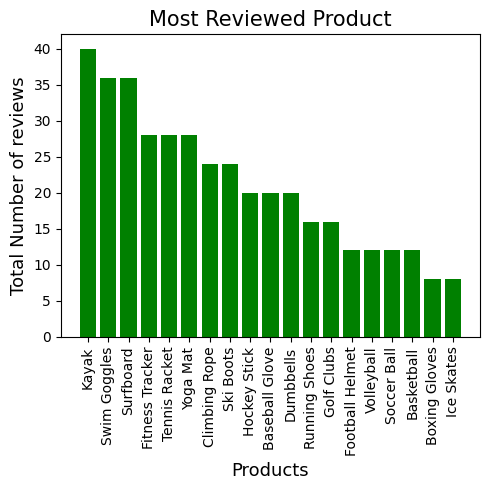

In [ ]:
# 4.1.4 Create a bar chart for ProductName and ReviewCount
plt.figure(figsize=(5, 5))

# Sort the result by 'ReviewCount' in descending order
sorted_result = rate_product.sort_values(by='Review_Count', ascending=False)

# Plotting the bar chart
plt.bar(sorted_result['ProductName'], sorted_result['Review_Count'], color='green')

# Adding labels and title
plt.title('Most Reviewed Product', fontsize=15)
plt.xlabel('Products', fontsize=13)
plt.ylabel('Total Number of reviews', fontsize=13)

# Rotating the x-axis labels for readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
#4.2 Perform basic sentiment analysis in Python

# Function to calculate sentiment polarity 
from textblob import TextBlob

def get_sentiment(text): 
    return TextBlob(str(text)).sentiment.polarity 
 
# Apply sentiment analysis to ReviewText 
customer_reviews["Sentiment"] = customer_reviews["ReviewText"].apply(get_sentiment) 
 
#customer_reviews_sorted = customer_reviews.sort_values(by="Sentiment", ascending=True)

# Display a few rows with sentiment scores 
result1=customer_reviews[["ProductID", "Rating", "ReviewText", "Sentiment"]].head()
result1


,ProductID,Rating,ReviewText,Sentiment
0,18,3,"Average experience, nothing special.",0.103571
1,19,5,The quality is top-notch.,1.000000
2,13,4,Five stars for the quick delivery.,0.333333
3,15,3,"Good quality, but could be cheaper.",0.700000
4,2,3,"Average experience, nothing special.",0.103571


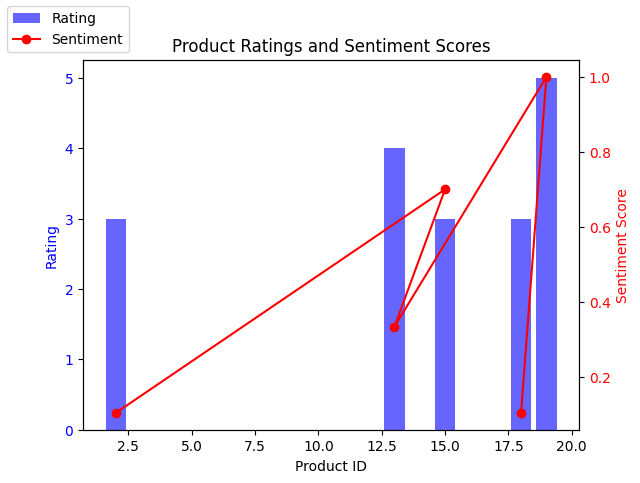

In [ ]:


df5 = pd.DataFrame(result1)

# Creating the plot
fig, ax1 = plt.subplots()

# Bar chart for Ratings
ax1.bar(result1['ProductID'], result1['Rating'], color='b', alpha=0.6, label='Rating')
ax1.set_xlabel('Product ID')
ax1.set_ylabel('Rating', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Line plot for Sentiment on the second y-axis
ax2 = ax1.twinx()
ax2.plot(result1['ProductID'], result1['Sentiment'], color='r', marker='o', label='Sentiment')
ax2.set_ylabel('Sentiment Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and legend
plt.title('Product Ratings and Sentiment Scores')
fig.legend(loc='upper left')
plt.show()


In [38]:
#4.3 Correlate review trends with product performance
cursor10 = connection.cursor()
review_performance= """

SELECT R.ProductID, P.ProductName,COUNT(*) AS Number_Of_Reviews, 
Round(avg(R.Rating),2) as Average_Rating, Round(sum(P.Price),2) as Total_Sales            
FROM customer_reviews as R 
INNER JOIN products as P on P.ProductID = R.ProductID         
GROUP BY R.ProductID, P.ProductName
ORDER BY R.ProductID;


"""
cursor10.execute(review_performance)

rows= cursor10.fetchall() 
#Get column names
columns = [desc[0] for desc in cursor10.description]

#Covert to DataFrame
review_performance= pd.DataFrame(rows, columns=columns)
review_performance

,ProductID,ProductName,Number_Of_Reviews,Average_Rating,Total_Sales
0,1,Running Shoes,4,4.00,895.00
1,2,Fitness Tracker,7,3.57,1376.76
2,3,Yoga Mat,7,3.71,3397.24
3,4,Dumbbells,5,3.00,131.05
4,5,Soccer Ball,3,4.00,123.78
5,6,Tennis Racket,7,3.86,252.49
6,7,Basketball,3,2.67,675.36
7,8,Football Helmet,3,5.00,134.25
8,9,Baseball Glove,5,3.40,1636.80
9,10,Golf Clubs,4,3.50,326.36


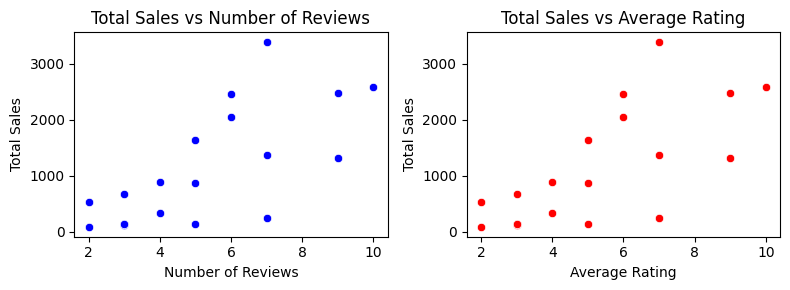

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# Scatter plot: Number of Reviews vs Total Sales
sns.scatterplot(x=review_performance["Number_Of_Reviews"], y=review_performance["Total_Sales"], ax=axes[0], color="blue")
axes[0].set_title("Total Sales vs Number of Reviews")
axes[0].set_xlabel("Number of Reviews")
axes[0].set_ylabel("Total Sales")

# Scatter plot: Average Rating vs Total Sales
sns.scatterplot(x=review_performance["Number_Of_Reviews"], y=review_performance["Total_Sales"], ax=axes[1], color="red")
axes[1].set_title("Total Sales vs Average Rating")
axes[1].set_xlabel("Average Rating")
axes[1].set_ylabel("Total Sales")

# Show plots
plt.tight_layout()
plt.show()

Marketing Effectiveness

In [24]:
#5.Marketing Effectiveness
#5.1 Calculate customer retention rate

# Filter only completed purchases 
purchases = customer_journey[customer_journey["Stage"] == "Checkout"].groupby("CustomerID").size() 
     
# Count repeat customers (more than 1 purchase) 
repeat_customers = purchases[purchases > 1].count() 
     
# Total number of unique customers 
total_customers = purchases.count() 

# Calculate retention rate 
retention_rate = (repeat_customers / total_customers) * 100

print('Customer Retention rate:',retention_rate )


Customer Retention rate: 5.263157894736842


In [25]:
#5.2.Compare repeat vs. first-time buyers

#Filter only completed purchases 
purchases = customer_journey[customer_journey["Stage"] == "Checkout"].groupby("CustomerID").size() 
     
# First-time buyers (purchase count = 1) 
first_time_buyers = purchases[purchases == 1].count() 
     
# Repeat buyers (purchase count > 1) 

repeat_buyers = purchases[purchases > 1].count() 

print('First time buyers:',first_time_buyers)
print('Repeat buyers:',repeat_buyers)


First time buyers: 18
Repeat buyers: 1


In [26]:
#5.3 Find best-performing products per region

cursor11 = connection.cursor()
best_performing_product_per_region= """

with best_performing_product_per_region as (
		SELECT G.Country, P.ProductName, count(P.ProductName) AS ProductCount,
		ROW_NUMBER() OVER(PARTITION BY G.country order by count(P.ProductName) DESC, P.ProductName) as rank_new_order
		FROM customers AS C
		INNER JOIN customer_journey AS J ON J.CustomerID = C.CustomerID
		INNER JOIN geography AS G ON G.GeographyID = C.GeographyID
		INNER JOIN products AS P ON P.ProductID = J.ProductID
		group by G.Country, P.ProductName
)
SELECT Country, ProductName, ProductCount FROM best_performing_product_per_region
WHERE rank_new_order = 1
ORDER BY Country;

"""
cursor11.execute(best_performing_product_per_region)

rows= cursor11.fetchall() 
#Get column names
columns = [desc[0] for desc in cursor11.description]

#Covert to DataFrame
best_performing_product_per_region= pd.DataFrame(rows, columns=columns)
best_performing_product_per_region

,Country,ProductName,ProductCount
0,Austria,Boxing Gloves,3
1,Belgium,Fitness Tracker,2
2,France,Baseball Glove,1
3,Germany,Boxing Gloves,2
4,Italy,Golf Clubs,3
5,Netherlands,Climbing Rope,2
6,Spain,Football Helmet,3
7,Sweden,Boxing Gloves,1
8,Switzerland,Volleyball,3
9,UK,Hockey Stick,2


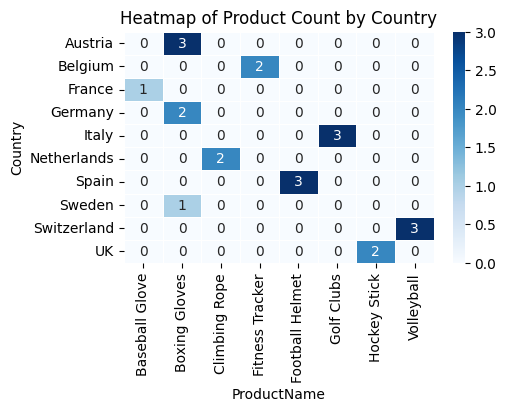

In [27]:
df = pd.DataFrame(best_performing_product_per_region)

# Pivot the data for heatmap
pivot_df = df.pivot(index="Country", columns="ProductName", values="ProductCount").fillna(0)

# Plotting the heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(pivot_df, annot=True, cmap="Blues", linewidths=0.5)

# Adding title
plt.title("Heatmap of Product Count by Country")

# Show the heatmap
plt.show()